In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
train=pd.read_csv(r"/kaggle/input/spaceship-titanic/train.csv")
test=pd.read_csv(r"/kaggle/input/spaceship-titanic/test.csv")

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [4]:
y_train = train['Transported']
train.drop(['Transported'], axis =1, inplace = True)

In [5]:
numeric_columns=train.select_dtypes(include=np.number).columns.tolist()
object_columns=train.select_dtypes(exclude=np.number).columns.tolist()

In [6]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(strategy='mean')
imp_most_frequent = SimpleImputer(strategy='most_frequent')

for col in numeric_columns:
    imputed_mean_train = imp_mean.fit_transform(train[col].values.reshape(-1, 1))
    train[col] = pd.Series(imputed_mean_train.flatten())
    
    imputed_mean_test = imp_mean.fit_transform(test[col].values.reshape(-1, 1))
    test[col] = pd.Series(imputed_mean_test.flatten())

for col in object_columns:
    imputed_object_train = imp_most_frequent.fit_transform(train[col].values.reshape(-1, 1))
    train[col] = pd.Series(imputed_object_train.flatten())
    
    imputed_object_test = imp_most_frequent.fit_transform(test[col].values.reshape(-1, 1))
    test[col] = pd.Series(imputed_object_test.flatten())

In [7]:

train = pd.concat([train, y_train], axis=1)



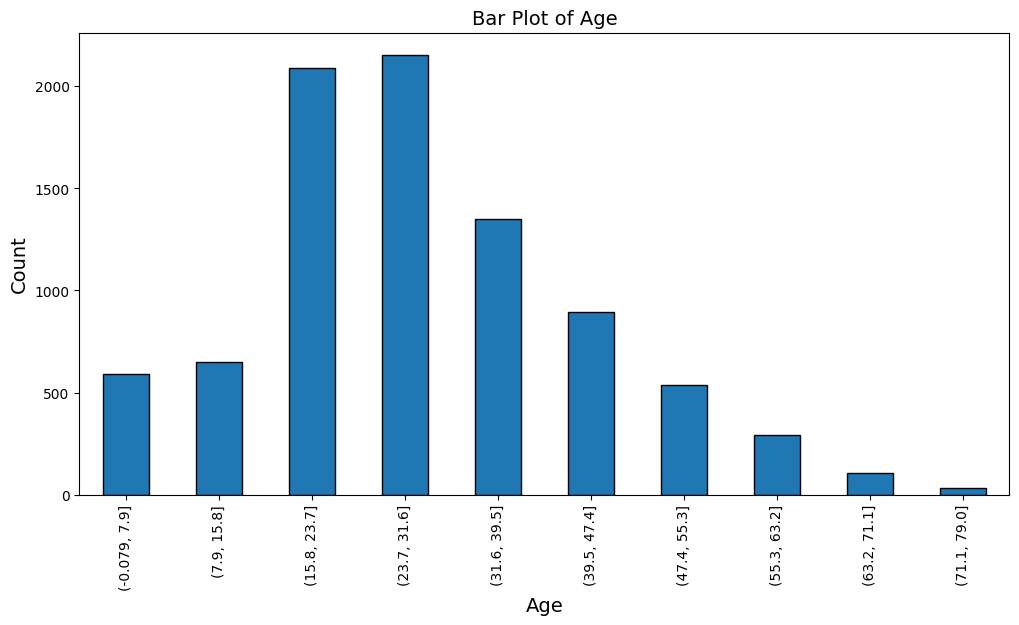

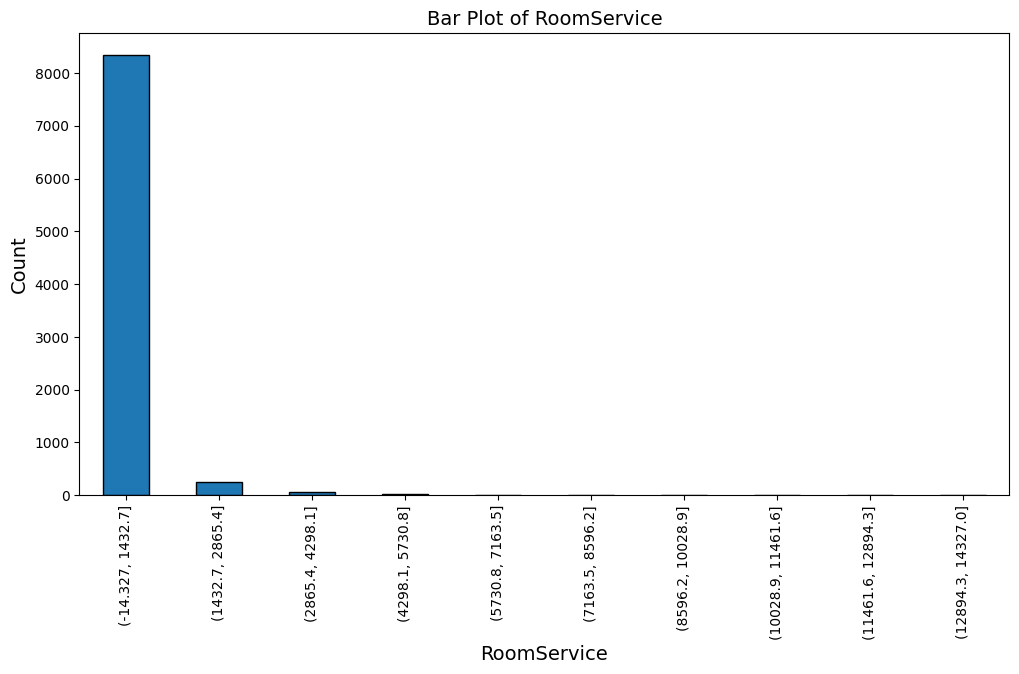

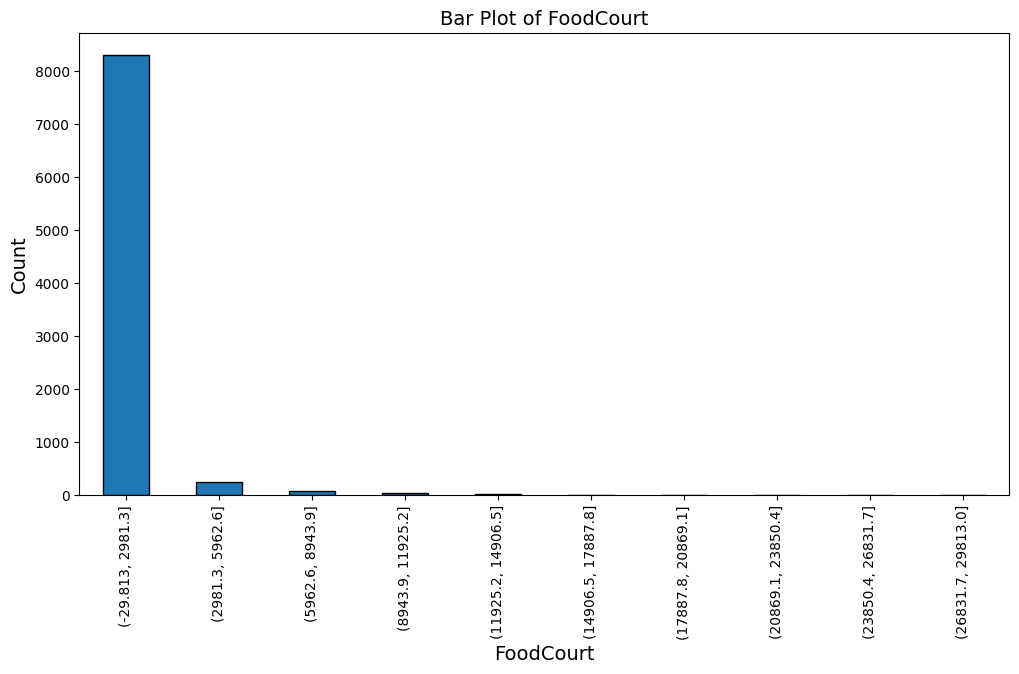

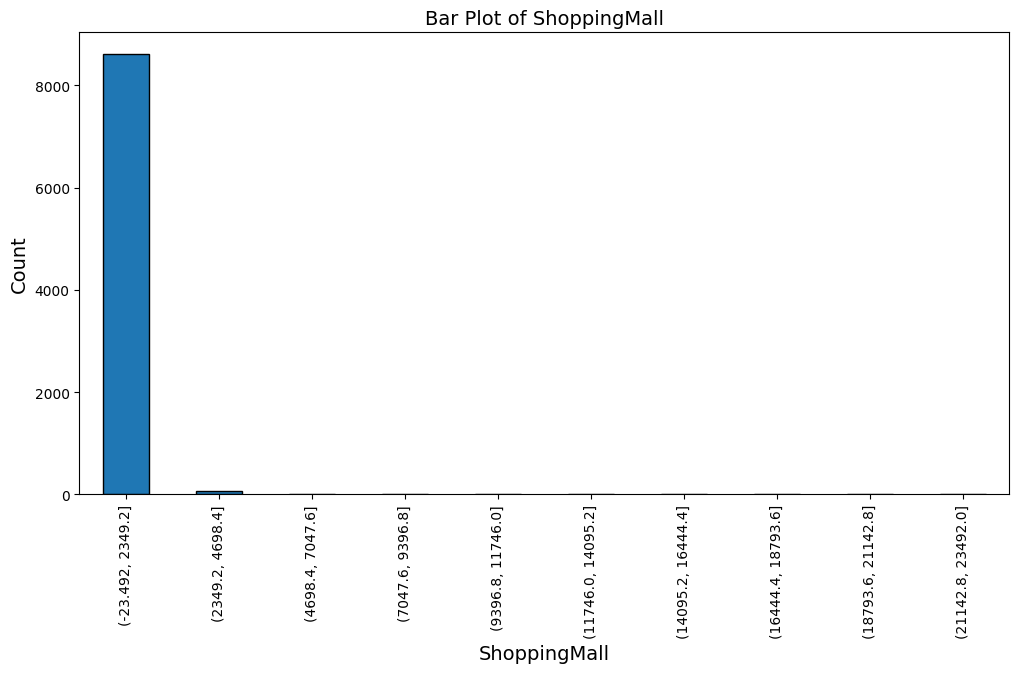

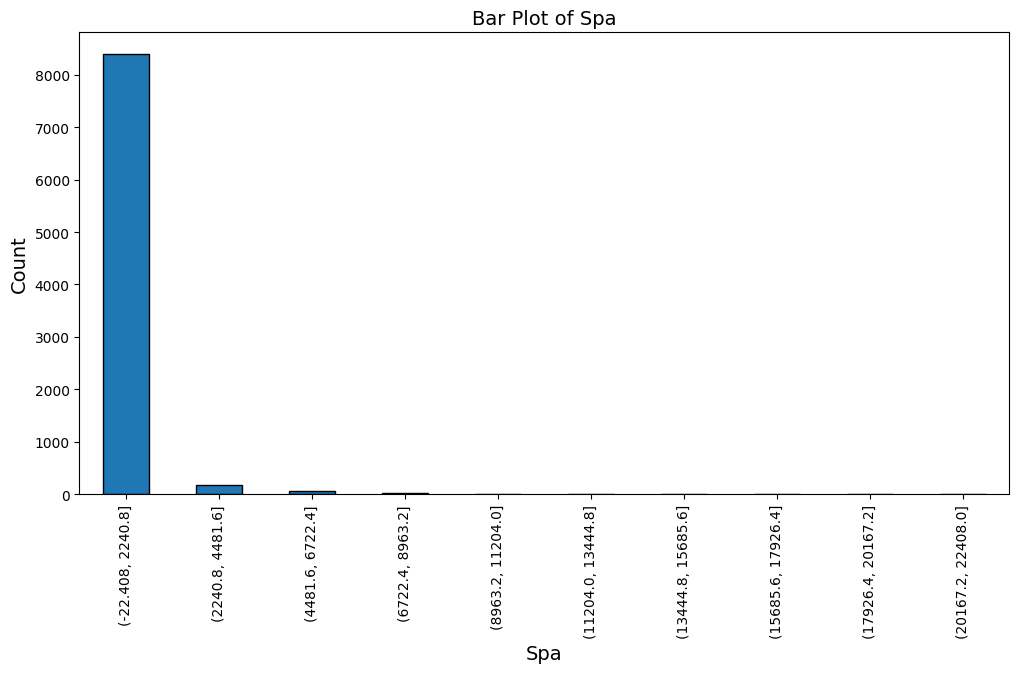

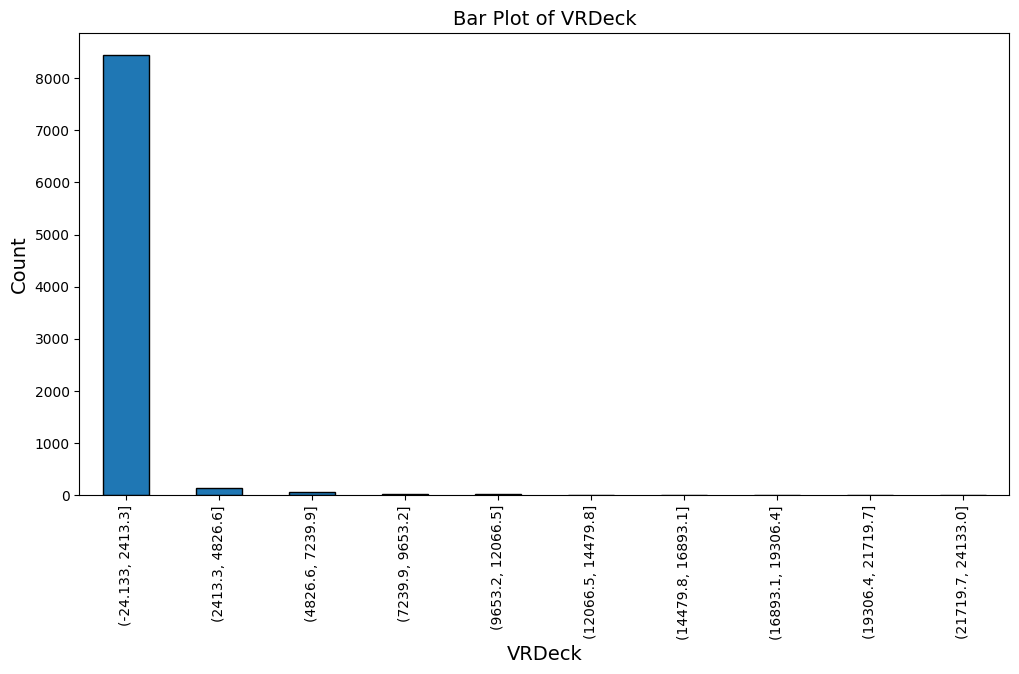

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data for demonstration
# train = pd.read_csv('your_dataset.csv')

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

numerical_features = train.select_dtypes(include=['int64', 'float64']).columns

for feature in numerical_features:
    if feature != 'SalePrice':  # Exclude the target column itself
        plt.figure(figsize=(12, 6))
        
        # Bin the numerical feature into 10 categories
        binned_data = pd.cut(train[feature], bins=10).value_counts().sort_index()
        
        # Create a bar plot
        binned_data.plot(kind='bar', edgecolor='black')
        
        plt.title(f'Bar Plot of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.show()


In [9]:
drop_column=['Name','PassengerId']
for drop_column in drop_column:
    train.drop(drop_column,axis=1,inplace=True)
    test.drop(drop_column,axis=1,inplace=True)

In [10]:

train['Transported'] = train['Transported'].astype('object')


In [11]:
train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [12]:
cabin_split = train['Cabin'].str.split('/', expand=True)
train['Deck'] = cabin_split[0]
train['Number'] = cabin_split[1]
train['Side'] = cabin_split[2]

In [13]:
cabin_split = test['Cabin'].str.split('/', expand=True)
test['Deck'] = cabin_split[0]
test['Number'] = cabin_split[1]
test['Side'] = cabin_split[2]

In [14]:
train.drop(columns='Cabin', axis=1, inplace=True)
test.drop(columns='Cabin', axis=1, inplace=True)


In [15]:
import pandas as pd

# Assuming train and test are your DataFrames
# Convert the 'Number' column to numeric (it will convert string numbers to actual numbers and force errors to NaN)
train['Number'] = pd.to_numeric(train['Number'], errors='coerce')
test['Number'] = pd.to_numeric(test['Number'], errors='coerce')

# Now fill NaN values with the mean and convert to integer
train['Number'] = train['Number'].fillna(train['Number'].mean()).astype(int)
test['Number'] = test['Number'].fillna(test['Number'].mean()).astype(int)


Percentage of 'Transported' for HomePlanet:
HomePlanet
Europa    65.884561
Mars      52.302445
Earth     42.764939
dtype: float64

Percentage of 'Transported' for CryoSleep:
CryoSleep
True     81.758314
False    33.504243
dtype: float64

Percentage of 'Transported' for Destination:
Destination
55 Cancri e      61.000000
PSO J318.5-22    50.376884
TRAPPIST-1e      47.219944
dtype: float64

Percentage of 'Transported' for VIP:
VIP
False    50.647516
True     38.190955
dtype: float64

Percentage of 'Transported' for Deck:
Deck
B    73.427471
C    68.005355
G    51.522843
A    49.609375
F    43.987115
D    43.305439
E    35.730594
T    20.000000
dtype: float64

Percentage of 'Transported' for Side:
Side
S    55.270782
P    45.126010
dtype: float64



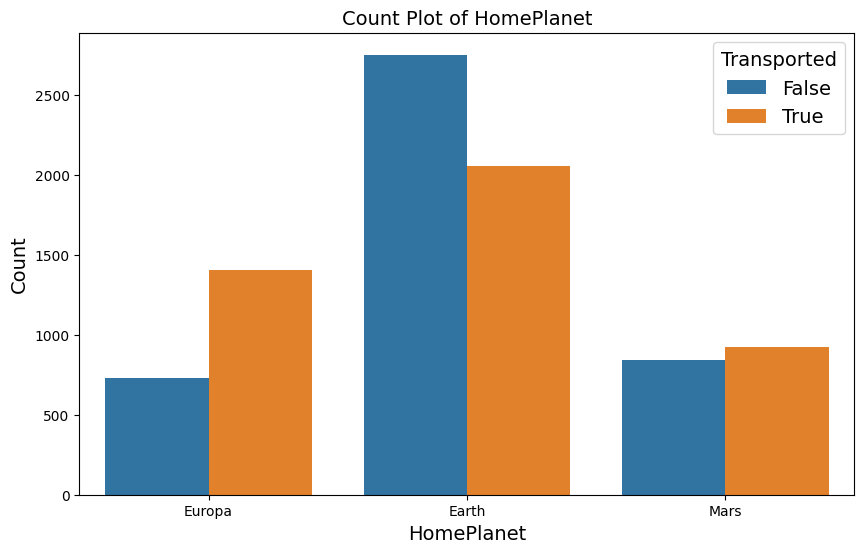

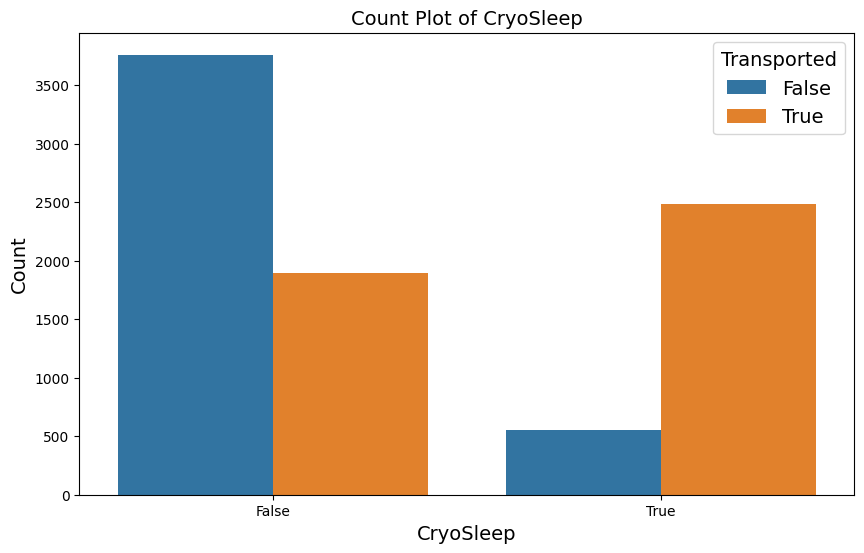

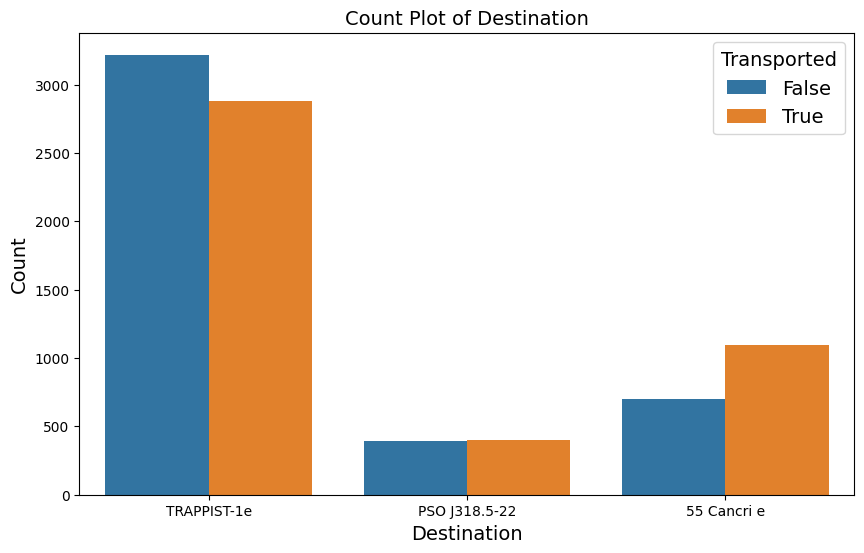

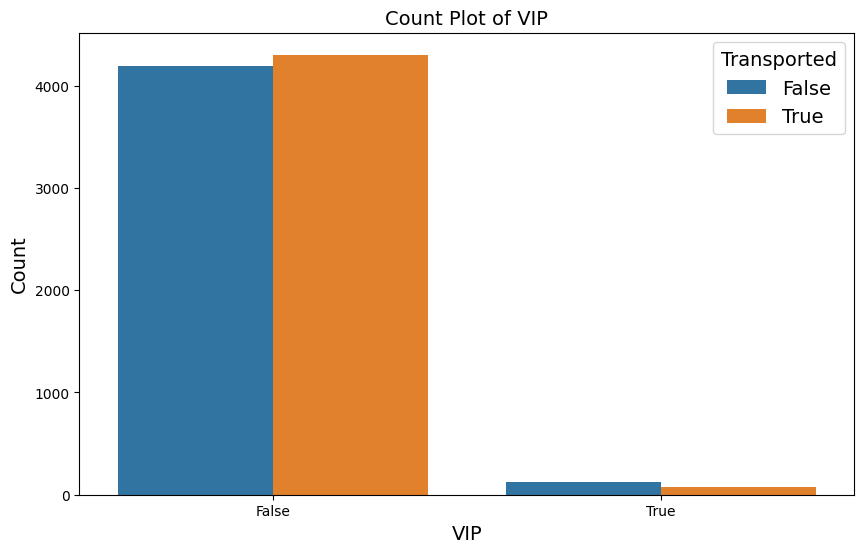

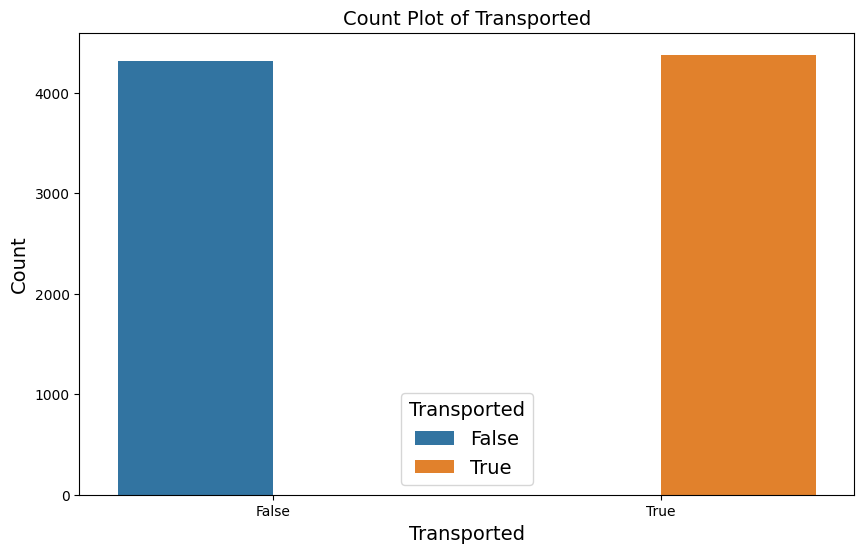

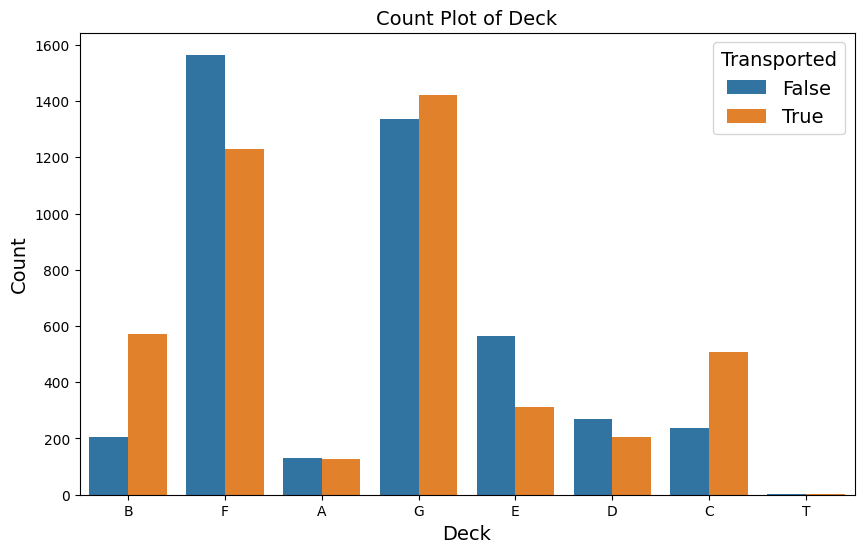

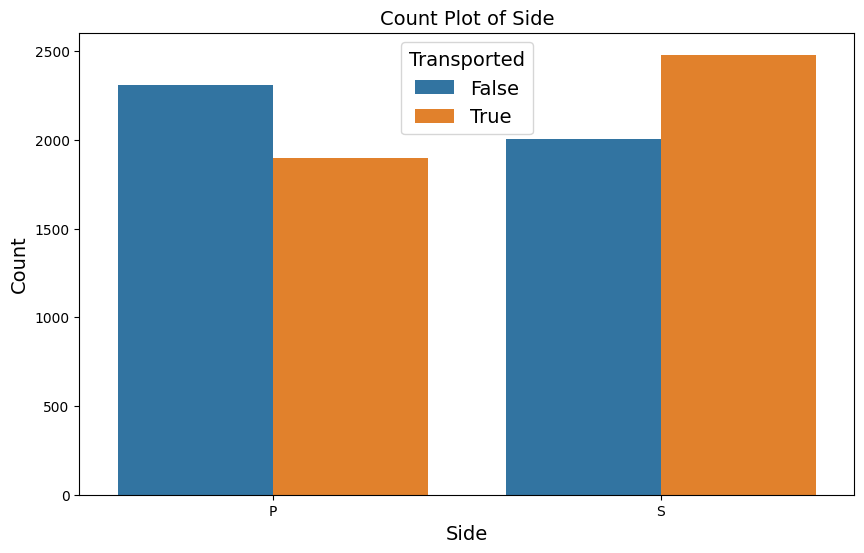

In [16]:
import seaborn as sns
# Identify categorical columns (object type)
categorical_columns = train.select_dtypes(include=['object']).columns

# Calculate percentage of 'Transported' for each category in categorical features
for column in categorical_columns:
    if column != 'Transported':
        percentage = (train[train['Transported'] == True].groupby(column).size() * 100 / train.groupby(column).size()).sort_values(ascending=False)
        print(f"Percentage of 'Transported' for {column}:\n{percentage}\n")

# Generate count plots for all categorical features
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=train, x=column, hue='Transported')
    plt.title(f'Count Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Transported')
    plt.show()

In [17]:
train['VIP'] = train['VIP'].astype(str)
train.loc[train['VIP']=='False', 'VIP'] = 0
train.loc[train['VIP']=='True', 'VIP'] = 1
train['VIP'] = train['VIP'].astype('object')

test['VIP'] = test['VIP'].astype(str)
test.loc[test['VIP']=='False', 'VIP'] = 0
test.loc[test['VIP']=='True', 'VIP'] = 1
test['VIP'] = test['VIP'].astype('object')

In [18]:
train['CryoSleep'] = train['CryoSleep'].astype(str)
train.loc[train['CryoSleep']=='True', 'CryoSleep'] = 0
train.loc[train['CryoSleep']=='False', 'CryoSleep'] = 1
train['CryoSleep'] = train['CryoSleep'].astype('object')

test['CryoSleep'] = test['CryoSleep'].astype(str)
test.loc[test['CryoSleep']=='True', 'CryoSleep'] = 0
test.loc[test['CryoSleep']=='False', 'CryoSleep'] = 1
test['CryoSleep'] = test['CryoSleep'].astype('object')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

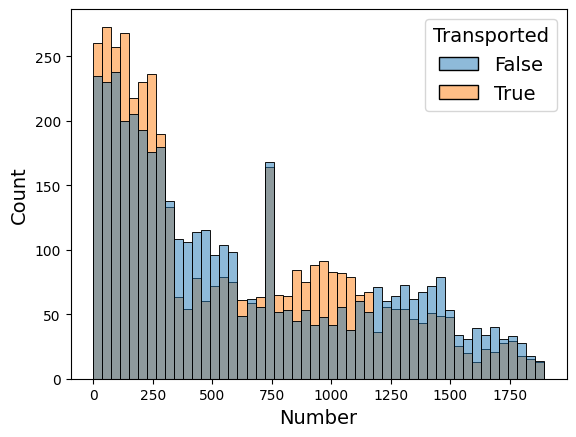

In [19]:
sns.histplot(data=train, x='Number',hue='Transported', bins=50)
train['true_region'] = np.where((train['Number'] <= 289) | ((train['Number'] > 615) & (train['Number'] < 1192)), 1, 0)
train['true_region'] = train['true_region'].astype('object')
train['false_region'] = np.where((train['Number'] > 289) & (train['Number'] <= 615) | (train['Number'] >= 1192), 1, 0)
train['false_region'] = train['false_region'].astype('object')
test['true_region'] = np.where((test['Number'] <= 289) | ((test['Number'] > 615) & (test['Number'] < 1192)), 1, 0)
test['true_region'] = test['true_region'].astype('object')
test['false_region'] = np.where((test['Number'] > 289) & (test['Number'] <= 615) | (test['Number'] >= 1192), 1, 0)
test['false_region'] = test['false_region'].astype('object')

In [20]:
non_categorical_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

for feature in non_categorical_features:
    test[feature] = pd.to_numeric(test[feature].replace('Missing', np.nan)).fillna(test[feature].mean())
    train[feature]=pd.to_numeric(train[feature].replace('Missing',np.nan)).fillna(train[feature].mean())

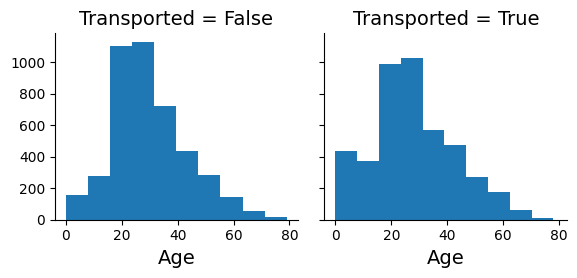

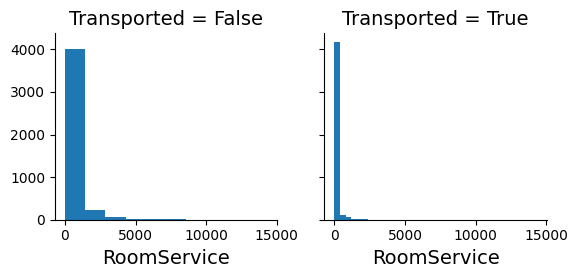

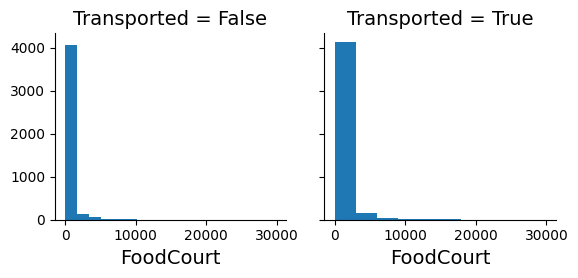

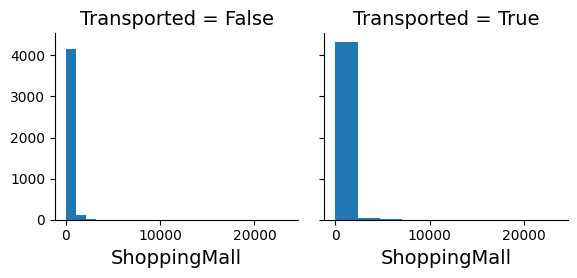

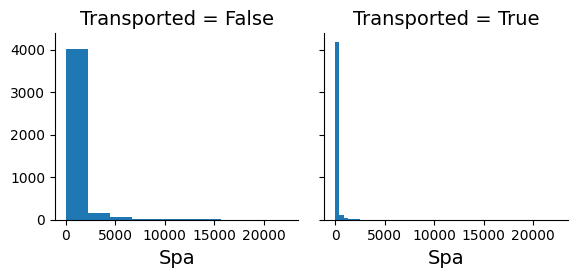

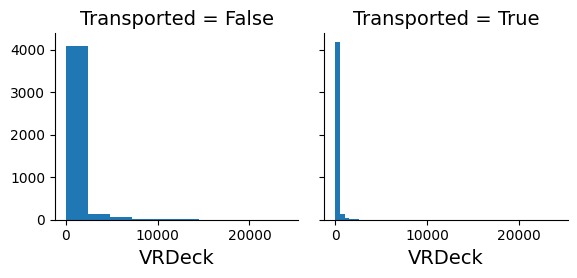

In [21]:

for feature in non_categorical_features:
    g = sns.FacetGrid(train, col='Transported')
    g.map(plt.hist, feature, bins=10)
    

In [22]:
# Apply binning and calculate mean Transported for each bin
for feature in non_categorical_features:
    train[feature + 'Bins'] = pd.cut(train[feature].astype('int'), bins=10)
    mean_transport = train[[feature + 'Bins', 'Transported']].groupby([feature + 'Bins'], as_index=False, observed=False).mean().sort_values(by='Transported', ascending=False)
    print(f"Feature: {feature}")
    print(mean_transport)
    print("\n")

Feature: Age
         AgeBins Transported
0  (-0.079, 7.9]    0.732657
1    (7.9, 15.8]    0.571649
7   (55.3, 63.2]    0.513605
5   (39.5, 47.4]    0.512878
8   (63.2, 71.1]    0.490566
3   (23.7, 31.6]    0.477494
2   (15.8, 23.7]    0.473432
6   (47.4, 55.3]    0.472015
4   (31.6, 39.5]    0.467407
9   (71.1, 79.0]    0.366667


Feature: RoomService
      RoomServiceBins Transported
0   (-14.327, 1432.7]    0.520331
1    (1432.7, 2865.4]    0.129921
2    (2865.4, 4298.1]    0.107692
3    (4298.1, 5730.8]         0.0
4    (5730.8, 7163.5]         0.0
5    (7163.5, 8596.2]         0.0
6   (8596.2, 10028.9]         0.0
9  (12894.3, 14327.0]         0.0
7  (10028.9, 11461.6]         NaN
8  (11461.6, 12894.3]         NaN


Feature: FoodCourt
        FoodCourtBins Transported
6  (17887.8, 20869.1]         1.0
7  (20869.1, 23850.4]         1.0
8  (23850.4, 26831.7]         1.0
9  (26831.7, 29813.0]         1.0
5  (14906.5, 17887.8]    0.888889
3   (8943.9, 11925.2]    0.676471
1    (2981.3

In [23]:
train['Spa_log'] = np.log1p(train['Spa'])
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train['Spa_scaled'] = scaler.fit_transform(train[['Spa']])

In [24]:
train['SpaBins'] = pd.qcut(train['Spa'].astype('int'), q=4, duplicates='drop')
train[['SpaBins', 'Transported']].groupby(['SpaBins'], as_index=False).mean().sort_values(by='Transported', ascending=False)

/tmp/ipykernel_17/413445665.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train[['SpaBins', 'Transported']].groupby(['SpaBins'], as_index=False).mean().sort_values(by='Transported', ascending=False)


,SpaBins,Transported
0,"(-0.001, 89.0]",0.591167
1,"(89.0, 22408.0]",0.240792


In [25]:
train.loc[train['Spa'] <= 89, 'Spa'] = 0
train.loc[train['Spa'] > 89, 'Spa'] = 1
train['Spa'] = train['Spa'].astype('object')

In [26]:
test.loc[test['Spa'] <= 89, 'Spa'] = 0
test.loc[test['Spa'] > 89, 'Spa'] = 1
test['Spa'] = test['Spa'].astype('object')

In [27]:
train['VRDeckBins'] = pd.qcut(train['VRDeck'], q=5, duplicates='drop')
train[['VRDeckBins', 'Transported']].groupby(['VRDeckBins'], as_index=False).mean().sort_values(by='Transported', ascending=False)

/tmp/ipykernel_17/1908885817.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train[['VRDeckBins', 'Transported']].groupby(['VRDeckBins'], as_index=False).mean().sort_values(by='Transported', ascending=False)


,VRDeckBins,Transported
0,"(-0.001, 229.6]",0.569025
1,"(229.6, 24133.0]",0.242093


In [28]:
train.loc[train['VRDeck'] <= 229, 'VRDeck'] = 0
train.loc[train['VRDeck'] > 229, 'VRDeck'] = 1
train['VRDeck'] = train['VRDeck'].astype('object')

In [29]:


# Function to encode based on provided bins
def label_encode_bins(df, feature, bins):
    df[feature + 'Bins'] = pd.cut(df[feature], bins=bins, labels=False, include_lowest=True)
    df[feature + 'Bins'] = df[feature + 'Bins'].astype('int')  # Ensure they are integers

# Define the bins for each feature
age_bins = [-0.079, 7.9, 15.8, 23.7, 31.6, 39.5, 47.4, 55.3, 63.2, 71.1, 79.0]
roomservice_bins = [-14.327, 1432.7, 2865.4, 4298.1, 5730.8, 7163.5, 8596.2, 10028.9, 11461.6, 12894.3, 14327.0]
foodcourt_bins = [-29.813, 2981.3, 5962.6, 8943.9, 11925.2, 14906.5, 17887.8, 20869.1, 23850.4, 26831.7, 29813.0]
shoppingmall_bins = [-23.492, 2349.2, 4698.4, 7047.6, 9396.8, 11746.0, 14095.2, 16444.4, 18793.6, 21142.8, 23492.0]

# Apply the encoding to train and test datasets
label_encode_bins(train, 'Age', age_bins)
label_encode_bins(test, 'Age', age_bins)

label_encode_bins(train, 'RoomService', roomservice_bins)
label_encode_bins(test, 'RoomService', roomservice_bins)

label_encode_bins(train, 'FoodCourt', foodcourt_bins)
label_encode_bins(test, 'FoodCourt', foodcourt_bins)

label_encode_bins(train, 'ShoppingMall', shoppingmall_bins)
label_encode_bins(test, 'ShoppingMall', shoppingmall_bins)

train['Age'] = train['Age'].astype('object')
train['RoomService'] = train['RoomService'].astype('object')
train['FoodCourt'] = train['FoodCourt'].astype('object')
train['ShoppingMall'] = train['ShoppingMall'].astype('object')


In [30]:
from sklearn.preprocessing import LabelEncoder

# List of categorical features
categorical_features = ['HomePlanet', 'Destination', 'Deck', 'Side', 'true_region', 'false_region']

# Initialize the LabelEncoder
label_encoders = {}

# Apply LabelEncoder to each categorical feature
for feature in categorical_features:
    label_encoders[feature] = LabelEncoder()
    train[feature] = label_encoders[feature].fit_transform(train[feature])
    test[feature] = label_encoders[feature].fit_transform(test[feature])

In [31]:
experiment_train=pd.read_csv(r"/kaggle/input/spaceship-titanic/train.csv")
experiment_test=pd.read_csv(r"/kaggle/input/spaceship-titanic/test.csv")

In [32]:
for feature in non_categorical_features:
    experiment_train[feature] = pd.to_numeric(experiment_train[feature], errors='coerce')
    experiment_test[feature] = pd.to_numeric(experiment_test[feature], errors='coerce')
    experiment_train = experiment_train.assign(**{feature: experiment_train[feature].fillna(experiment_train[feature].mean())})
    experiment_test = experiment_test.assign(**{feature: experiment_test[feature].fillna(experiment_test[feature].mean())})


In [33]:
experiment_train['TotalCost'] = experiment_train['FoodCourt'] + experiment_train['RoomService'] + experiment_train['Spa'] + experiment_train['VRDeck'] + experiment_train['ShoppingMall']

In [34]:
experiment_test['TotalCost'] = experiment_test['FoodCourt'] + experiment_test['RoomService'] + experiment_test['Spa'] + experiment_test['VRDeck'] + experiment_test['ShoppingMall']

In [35]:
train['TotalCost'] = experiment_train['TotalCost']
train.loc[train['TotalCost'] <= 727, 'TotalCost'] = 0
train.loc[train['TotalCost'] > 727, 'TotalCost'] = 1
train['TotalCost'] = train['TotalCost'].astype('object')

In [36]:
test['TotalCost'] = experiment_test['TotalCost']
test.loc[test['TotalCost'] <= 727, 'TotalCost'] = 0
test.loc[test['TotalCost'] > 727, 'TotalCost'] = 1
test['TotalCost'] = test['TotalCost'].astype('object')

In [37]:
# Convert int64 columns to objects in train DataFrame
int64_columns = ['HomePlanet', 'Destination', 'Deck', 'Number', 'Side', 'true_region', 'false_region', 'AgeBins', 'RoomServiceBins', 'FoodCourtBins', 'ShoppingMallBins']

for column in int64_columns:
    train[column] = train[column].astype('object')
    test[column] = test[column].astype('object')

In [38]:
# Convert 'Transported' column into boolean
train['Transported'] = train['Transported'].astype(bool)


In [39]:
train_columns_to_drop = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa_log', 'Spa_scaled', 'SpaBins', 'VRDeckBins','Number']
test_columns_to_drop = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall','Number']

In [40]:
train.drop(columns=train_columns_to_drop, axis=1, inplace=True)
test.drop(columns=test_columns_to_drop, axis=1, inplace=True)

In [41]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HomePlanet        4277 non-null   object 
 1   CryoSleep         4277 non-null   object 
 2   Destination       4277 non-null   object 
 3   VIP               4277 non-null   object 
 4   Spa               4277 non-null   object 
 5   VRDeck            4277 non-null   float64
 6   Deck              4277 non-null   object 
 7   Side              4277 non-null   object 
 8   true_region       4277 non-null   object 
 9   false_region      4277 non-null   object 
 10  AgeBins           4277 non-null   object 
 11  RoomServiceBins   4277 non-null   object 
 12  FoodCourtBins     4277 non-null   object 
 13  ShoppingMallBins  4277 non-null   object 
 14  TotalCost         4277 non-null   object 
dtypes: float64(1), object(14)
memory usage: 501.3+ KB


In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   HomePlanet        8693 non-null   object
 1   CryoSleep         8693 non-null   object
 2   Destination       8693 non-null   object
 3   VIP               8693 non-null   object
 4   Spa               8693 non-null   object
 5   VRDeck            8693 non-null   object
 6   Transported       8693 non-null   bool  
 7   Deck              8693 non-null   object
 8   Side              8693 non-null   object
 9   true_region       8693 non-null   object
 10  false_region      8693 non-null   object
 11  AgeBins           8693 non-null   object
 12  RoomServiceBins   8693 non-null   object
 13  FoodCourtBins     8693 non-null   object
 14  ShoppingMallBins  8693 non-null   object
 15  TotalCost         8693 non-null   object
dtypes: bool(1), object(15)
memory usage: 1.0+ MB


In [43]:
from sklearn.model_selection import train_test_split
X_train, X_CV = train_test_split(train, test_size=0.2, random_state=42)

In [44]:
Y_train = X_train['Transported']
X_train.drop(columns='Transported', axis=1, inplace=True)

Y_CV = X_CV['Transported']
X_CV.drop(columns='Transported', axis=1, inplace=True)

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [11, 13, 15, 17],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, Y_train)
best_model = grid_search.best_estimator_
test_score = best_model.score(X_CV, Y_CV)
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Test set score: {test_score}")

Best parameters found: {'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'uniform'}
Test set score: 0.7492811960897068


In [46]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf = SVC()
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_CV)
accuracy = accuracy_score(Y_CV, y_pred)

print(f"Accuracy is {accuracy * 100:.2f}%")


Accuracy is 75.79%


In [47]:
test_pred = clf.predict(test)

In [48]:
test_pred

array([ True, False,  True, ...,  True, False,  True])

In [49]:
# Assuming 'PassengerId' is a column in your test DataFrame
test_passenger_id = experiment_test['PassengerId']

submission_series = pd.Series(test_pred, name='Transported')
submission_df = pd.concat([test_passenger_id, submission_series], axis=1)
submission_df.columns = ['PassengerId', 'Transported']
submission_df.set_index('PassengerId', inplace=True)
submission_df.to_csv('submission.csv')